In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [5]:
airbnb = pd.read_csv("data.csv")

In [6]:
airbnb.shape

(48895, 16)

In [7]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
pd.set_option('display.max_columns',None)
print(airbnb.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [10]:
missing_values = airbnb.isna().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [11]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [12]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [14]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

In [16]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [17]:
le = LabelEncoder()
airbnb['neighbourhood_group'] = le.fit_transform(airbnb['neighbourhood_group'])
airbnb['neighbourhood'] = le.fit_transform(airbnb['neighbourhood'])
airbnb['room_type'] = le.fit_transform(airbnb['room_type'])

range for neighbourhood: 0 - 220

range for neighbourhood groups: 0 - 4

In [18]:
airbnb.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,1.675345,107.122732,40.728949,-73.952170,0.504060,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.735816,68.743096,0.054530,0.046157,0.545379,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,1.000000,51.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,2.000000,94.000000,40.723070,-73.955680,0.000000,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,2.000000,178.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

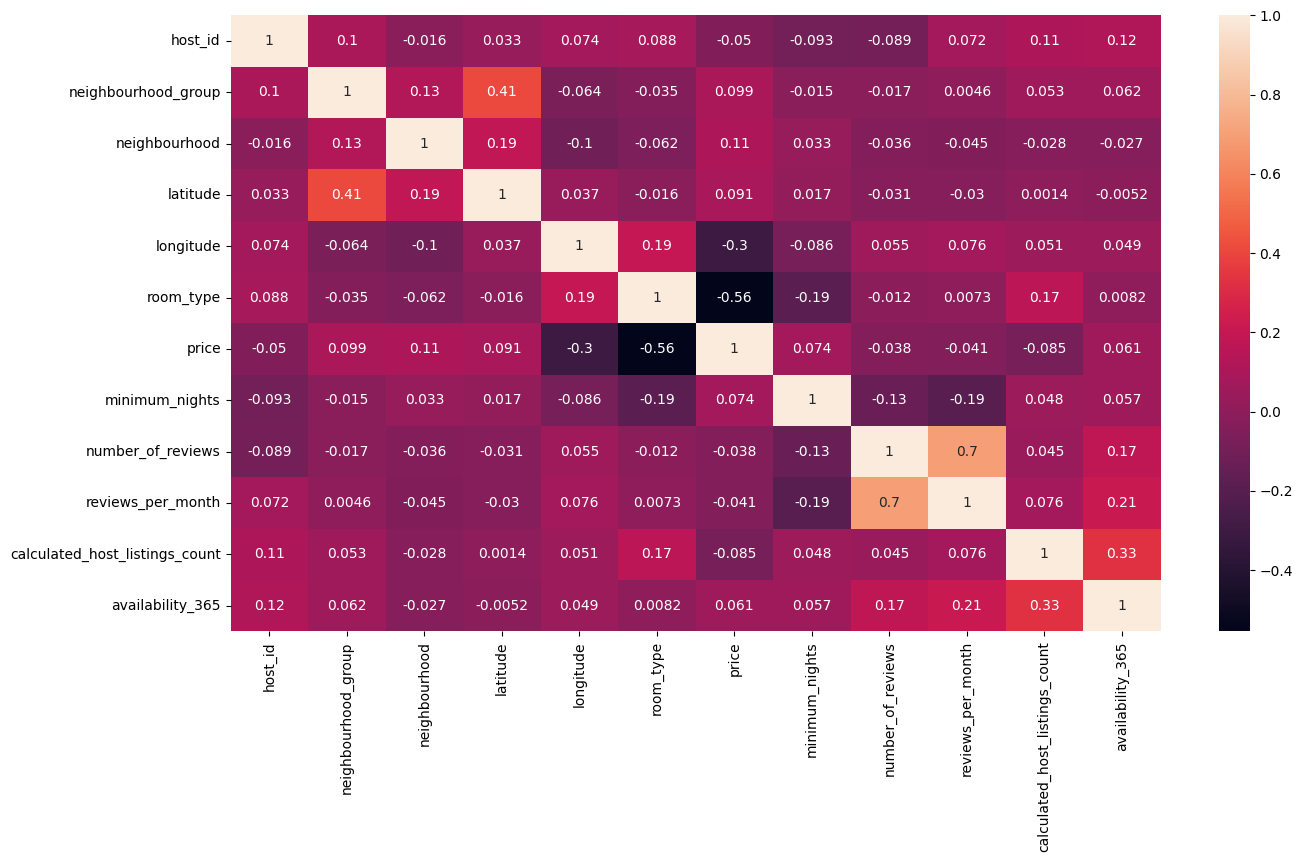

In [20]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [21]:
airbnb.shape

(48895, 12)

In [22]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [23]:
airbnb.tail(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48885,131529729,2,61,40.79633,-73.93605,1,75,2,0,0.0,2,353
48886,274311461,2,127,40.75561,-73.96723,0,200,6,0,0.0,1,176
48887,208514239,1,214,40.71232,-73.94220,0,170,1,0,0.0,3,365
48888,274321313,2,95,40.76392,-73.99183,1,125,4,0,0.0,1,31
48889,107716952,3,105,40.69137,-73.80844,1,65,1,0,0.0,2,163
48890,8232441,1,13,40.67853,-73.94995,1,70,2,0,0.0,2,9
48891,6570630,1,28,40.70184,-73.93317,1,40,4,0,0.0,2,36
48892,23492952,2,94,40.81475,-73.94867,0,115,10,0,0.0,1,27
48893,30985759,2,95,40.75751,-73.99112,2,55,1,0,0.0,6,2
48894,68119814,2,95,40.76404,-73.98933,1,90,7,0,0.0,1,23


In [24]:
# Factors Influencing Pricing

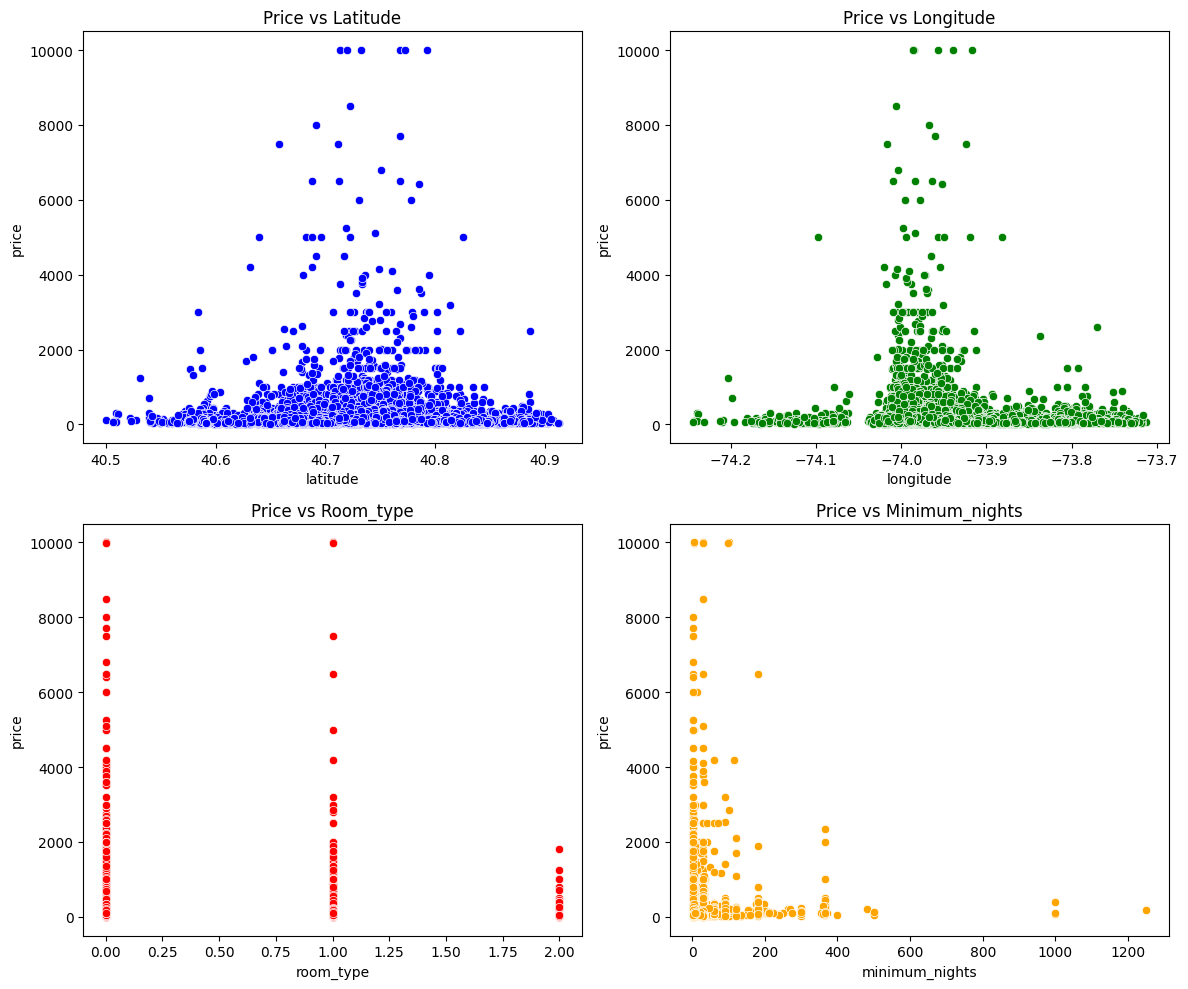

In [27]:
factors = ['latitude', 'longitude', 'room_type', 'minimum_nights']
colors = ['blue', 'green', 'red', 'orange']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, (factor, color) in enumerate(zip(factors, colors)):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=factor, y='price', data=airbnb, ax=axes[row, col], color=color)
    axes[row, col].set_title(f"Price vs {factor.capitalize()}")

plt.tight_layout()
plt.show()

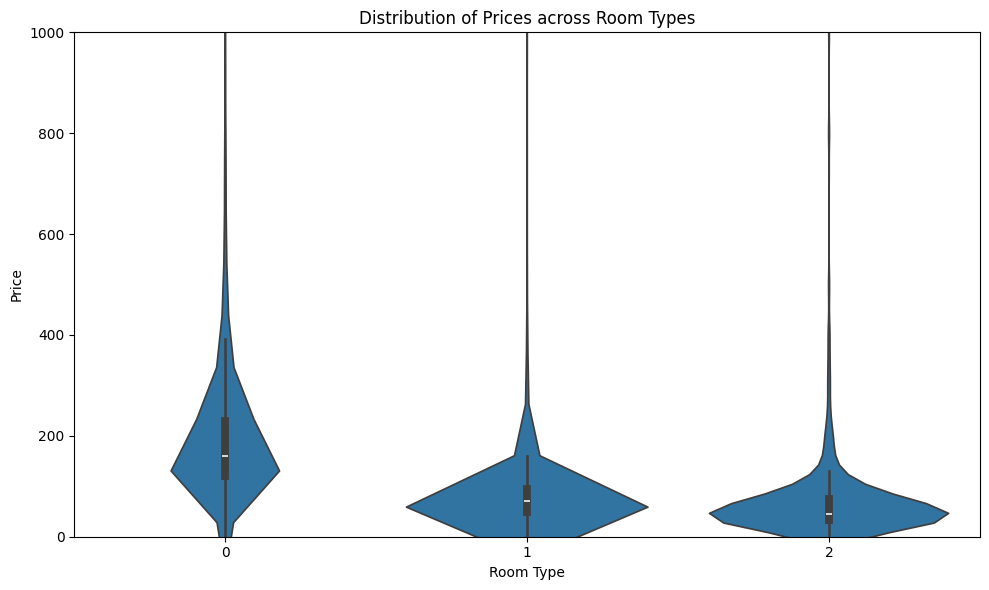

In [28]:
# Compare distribution of prices across different room types
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=airbnb)
plt.title('Distribution of Prices across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

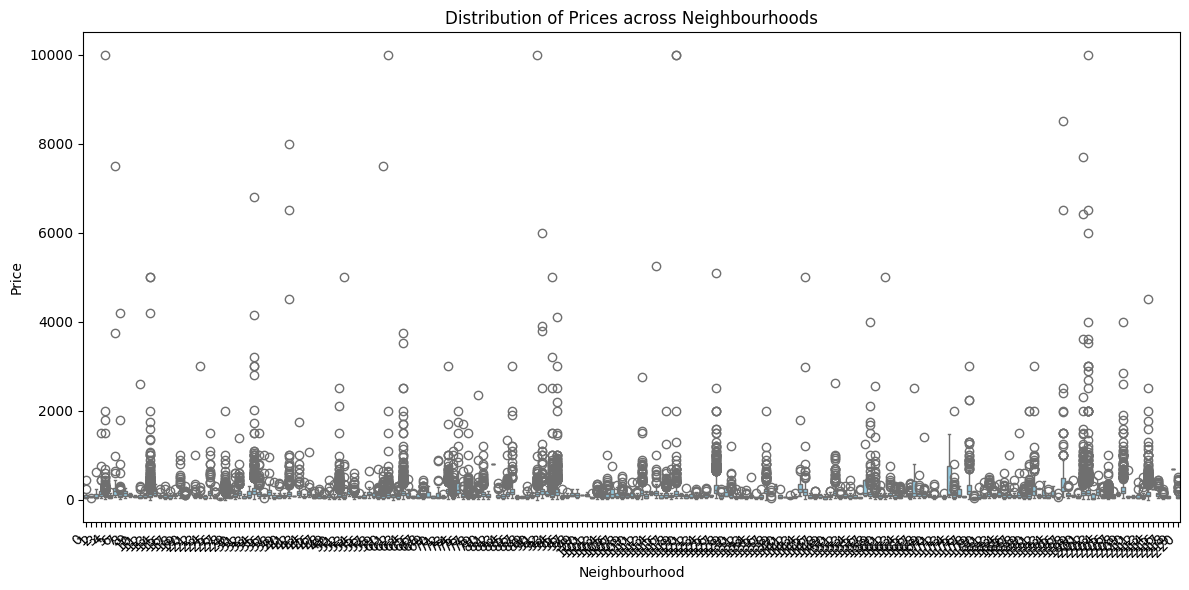

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=airbnb, color='skyblue')
plt.title('Distribution of Prices across Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

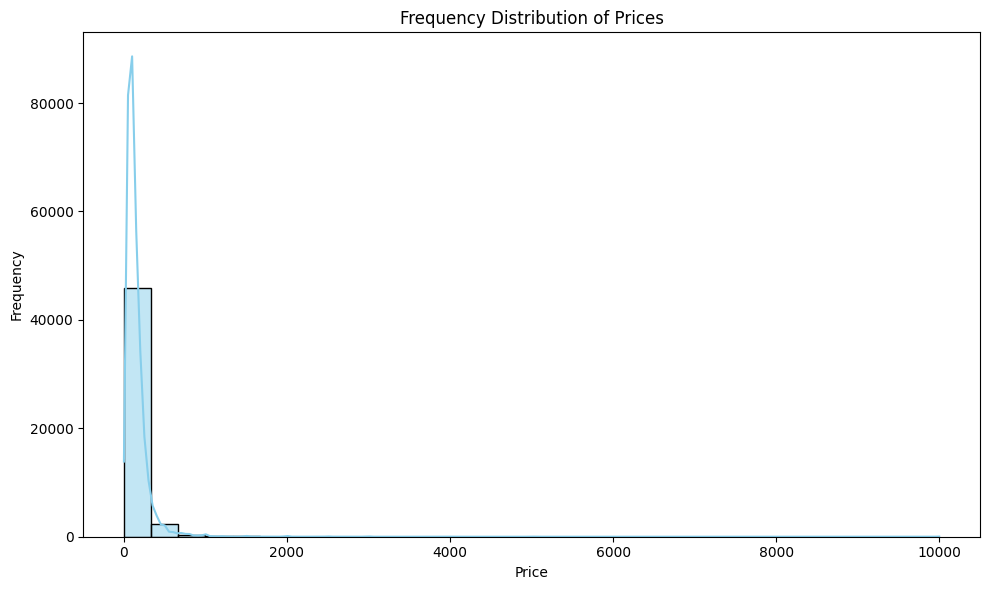

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(airbnb['price'], bins=30, kde=True, color='skyblue')
plt.title('Frequency Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [32]:
# Analysing Customer Feedback

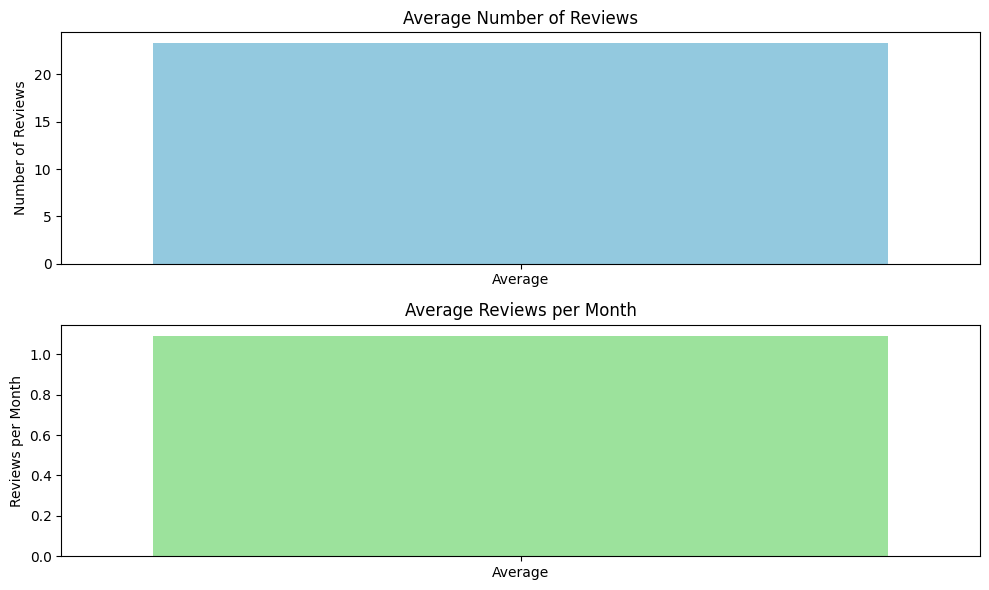

In [34]:
average_rating = airbnb['number_of_reviews'].mean()
reviews_per_month = airbnb['reviews_per_month'].mean()
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.barplot(x=['Average'], y=[average_rating], color='skyblue')
plt.title('Average Number of Reviews')
plt.ylabel('Number of Reviews')
plt.subplot(2, 1, 2)
sns.barplot(x=['Average'], y=[reviews_per_month], color='lightgreen')
plt.title('Average Reviews per Month')
plt.ylabel('Reviews per Month')

plt.tight_layout()
plt.show()

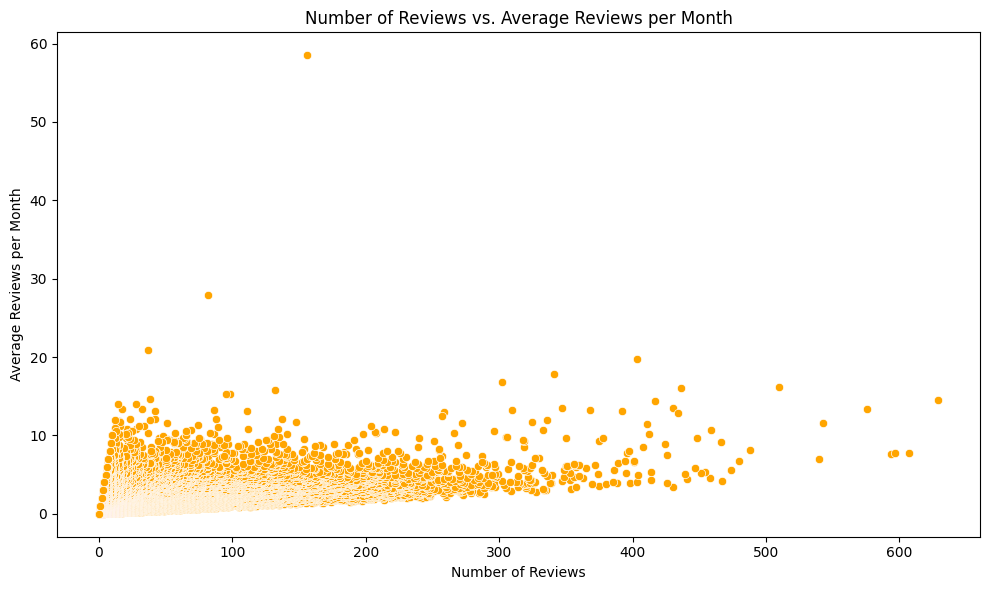

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=airbnb, color='orange')
plt.title('Number of Reviews vs. Average Reviews per Month')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Reviews per Month')
plt.tight_layout()
plt.show()

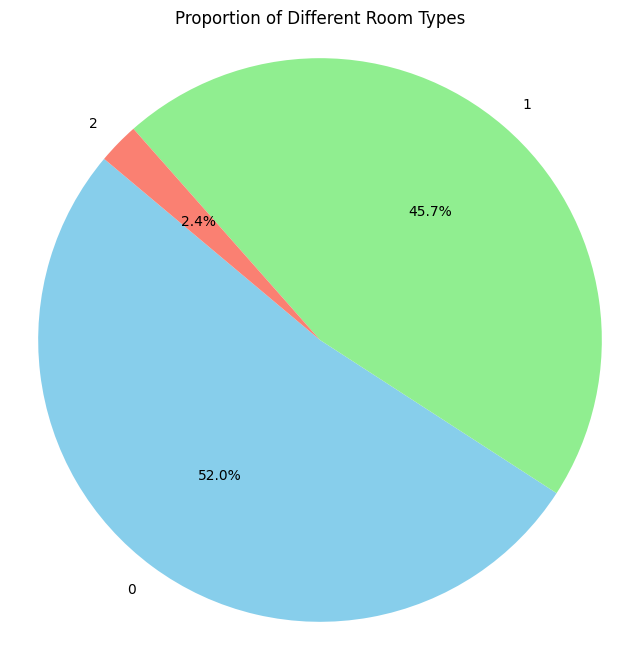

In [36]:
room_type_counts = airbnb['room_type'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Proportion of Different Room Types')
plt.axis('equal')
plt.show()

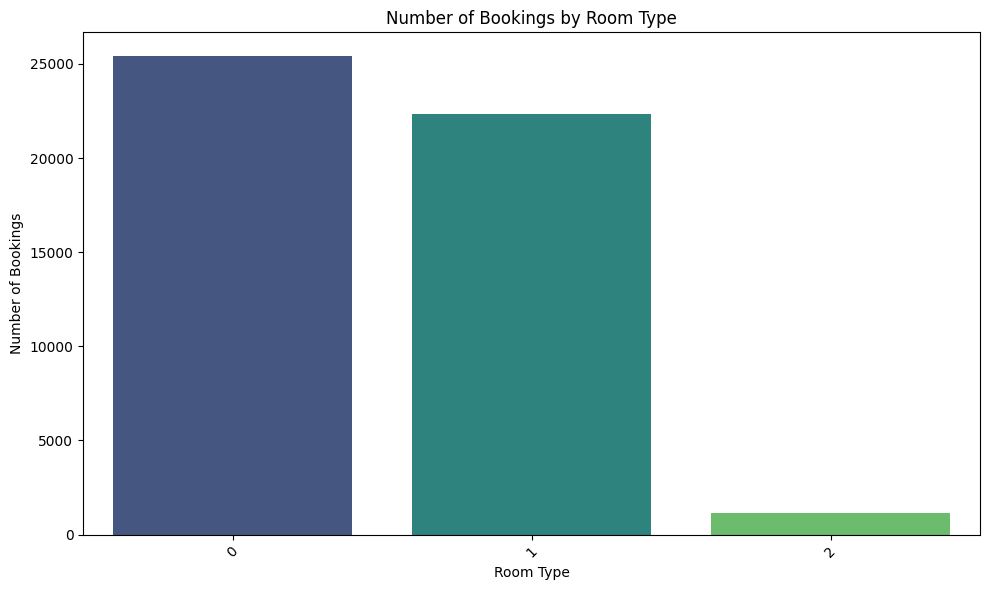

In [37]:
room_type_counts = airbnb['room_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Number of Bookings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

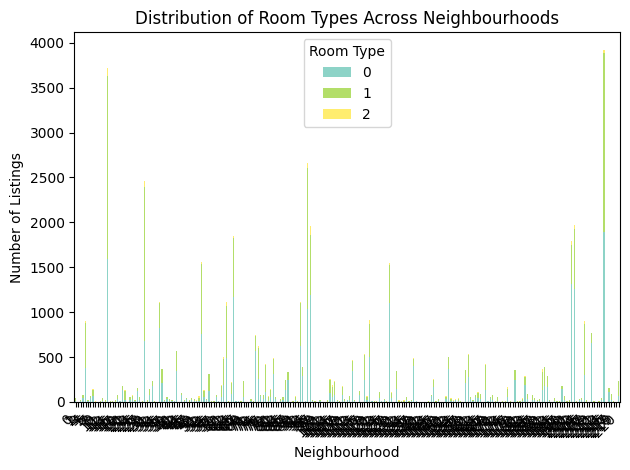

In [38]:
room_type_distribution = airbnb.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
room_type_distribution.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Distribution of Room Types Across Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

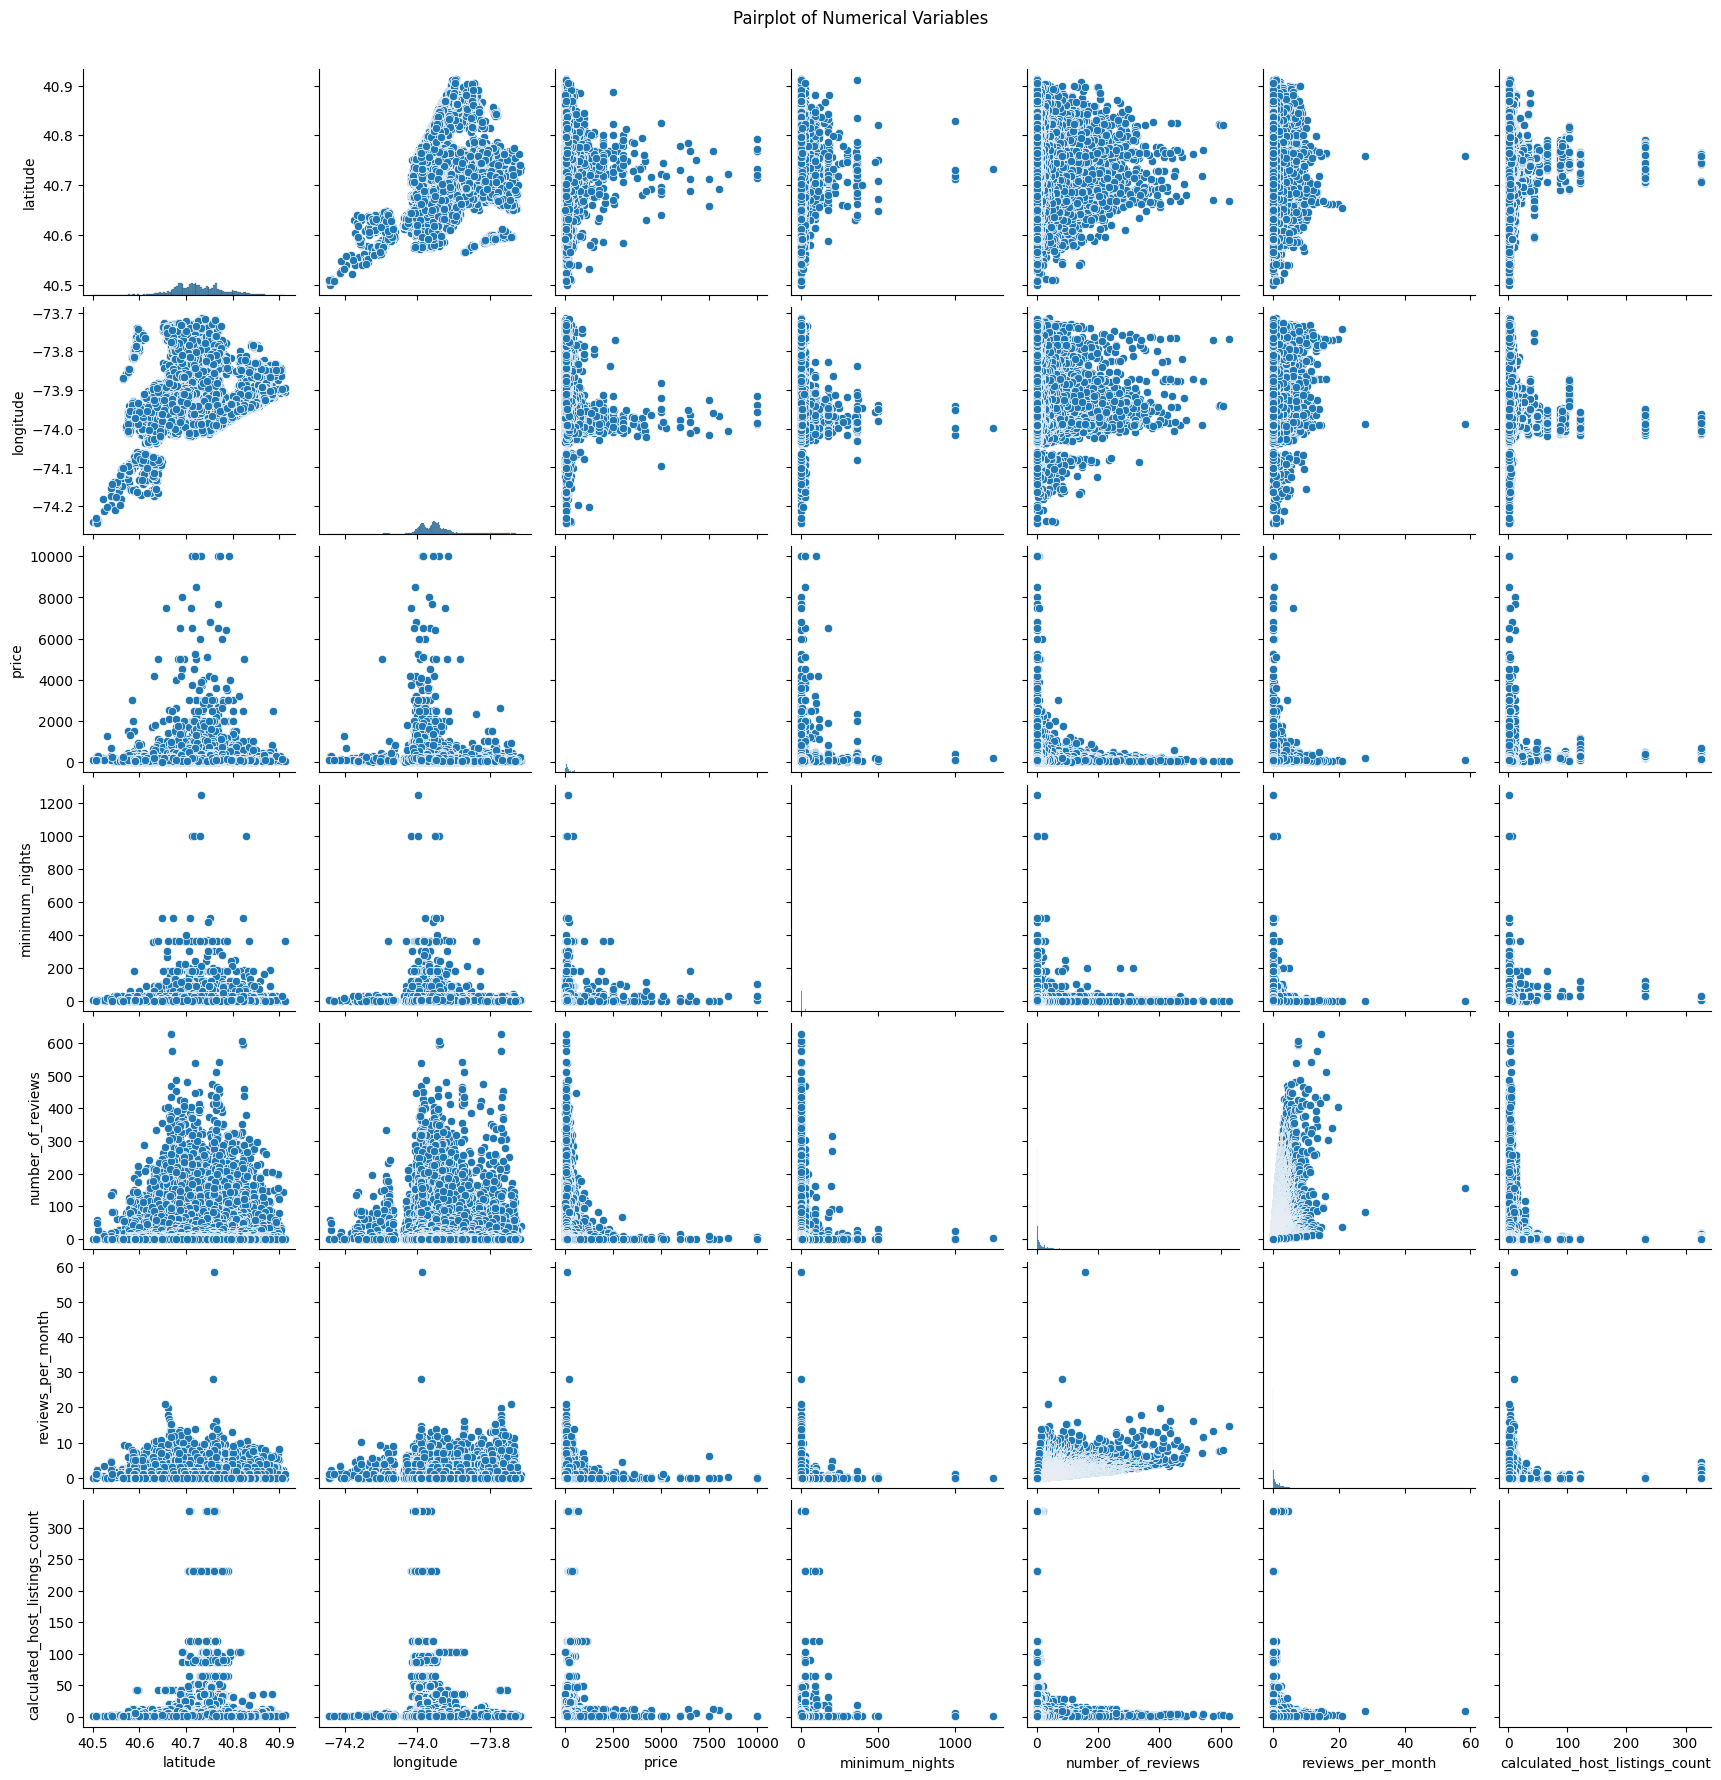

In [40]:
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
custom_palette = sns.color_palette("husl", len(numerical_columns))
sns.pairplot(airbnb[numerical_columns], palette=custom_palette)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [46]:
#Host analysis

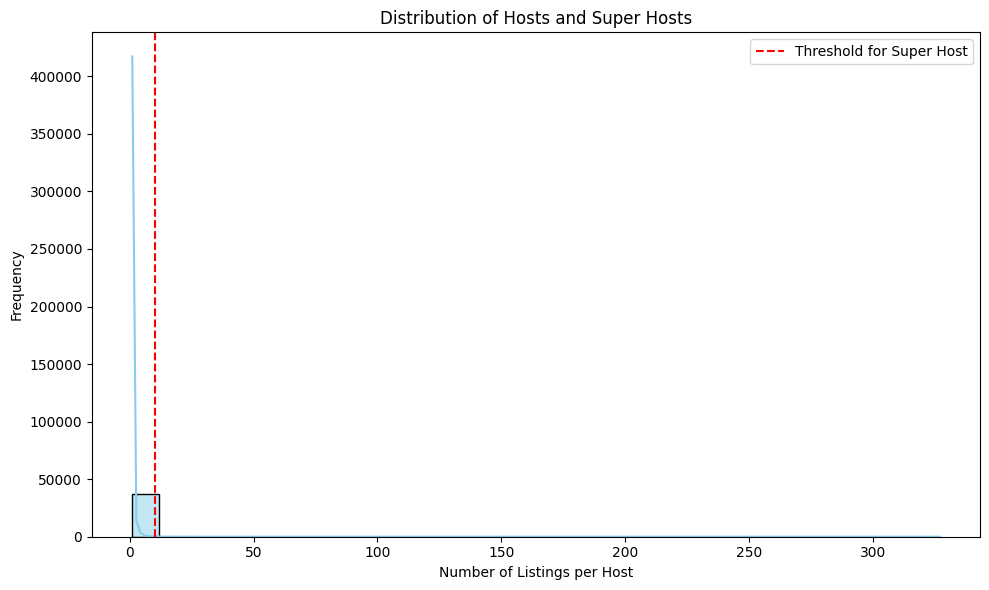

In [48]:
host_distribution = airbnb['host_id'].value_counts()
super_hosts = host_distribution[host_distribution >= 10]  # Assuming a host with 10 or more listings is considered a super host

# Plotting the distribution of hosts and super hosts
plt.figure(figsize=(10, 6))
sns.histplot(host_distribution, bins=30, color='skyblue', kde=True)
plt.axvline(x=10, color='red', linestyle='--', label='Threshold for Super Host')
plt.title('Distribution of Hosts and Super Hosts')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()
host_activity = airbnb.groupby('host_id')['calculated_host_listings_count'].mean()
listing_performance = airbnb.groupby('host_id')[['price', 'number_of_reviews', 'reviews_per_month']].mean()
host_metrics = pd.merge(host_activity, listing_performance, on='host_id', how='inner')


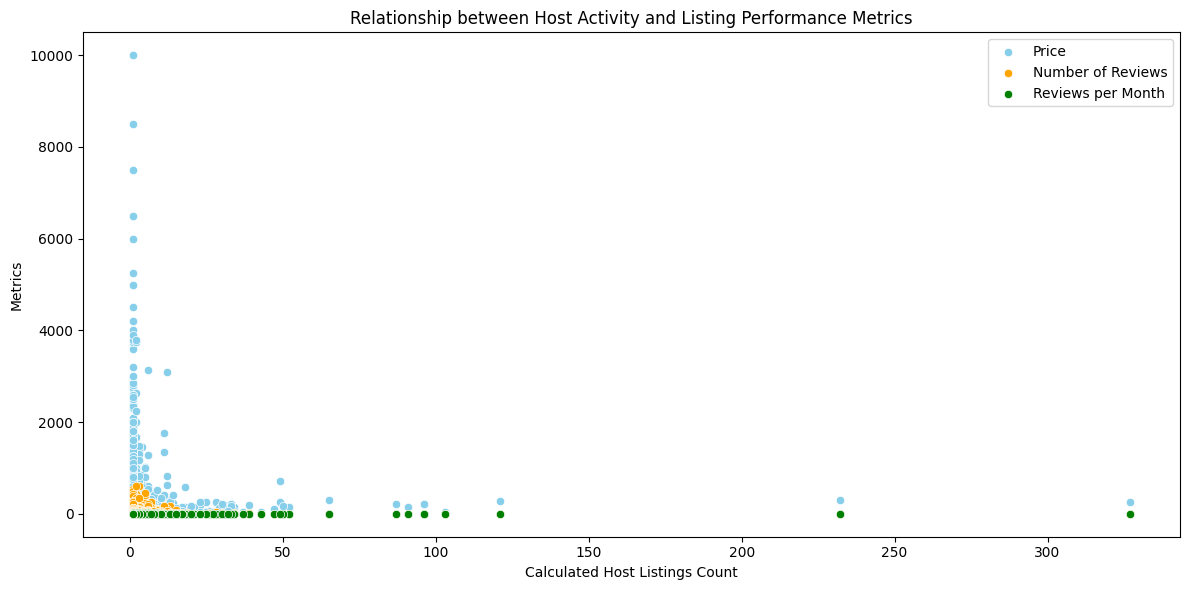

In [49]:
# Plotting the relationship between host activity and listing performance metrics
plt.figure(figsize=(12, 6))
sns.scatterplot(x='calculated_host_listings_count', y='price', data=host_metrics, color='skyblue', label='Price')
sns.scatterplot(x='calculated_host_listings_count', y='number_of_reviews', data=host_metrics, color='orange', label='Number of Reviews')
sns.scatterplot(x='calculated_host_listings_count', y='reviews_per_month', data=host_metrics, color='green', label='Reviews per Month')
plt.title('Relationship between Host Activity and Listing Performance Metrics')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Metrics')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
!pip install gmplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 2.7 MB/s eta 0:00:00


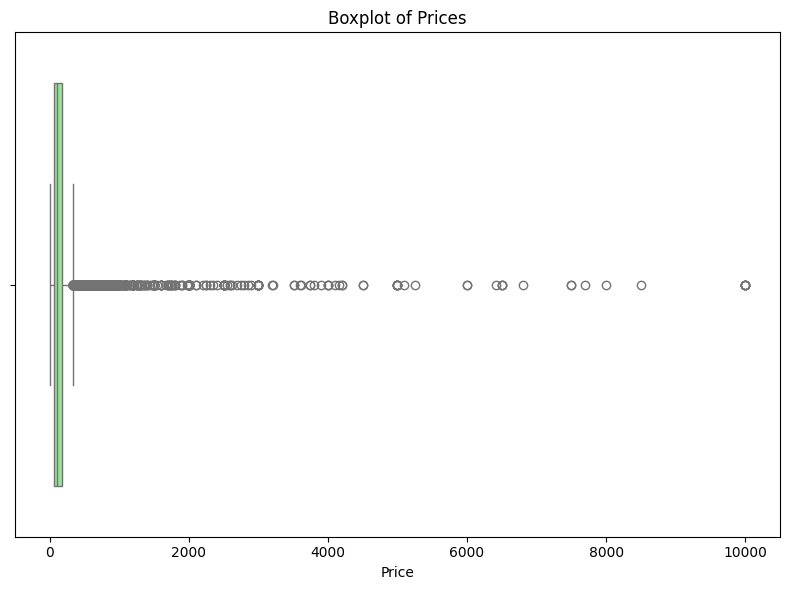

In [57]:
# Price Analysis:
# Identifying outliers in price using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=airbnb['price'], color='lightgreen')
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

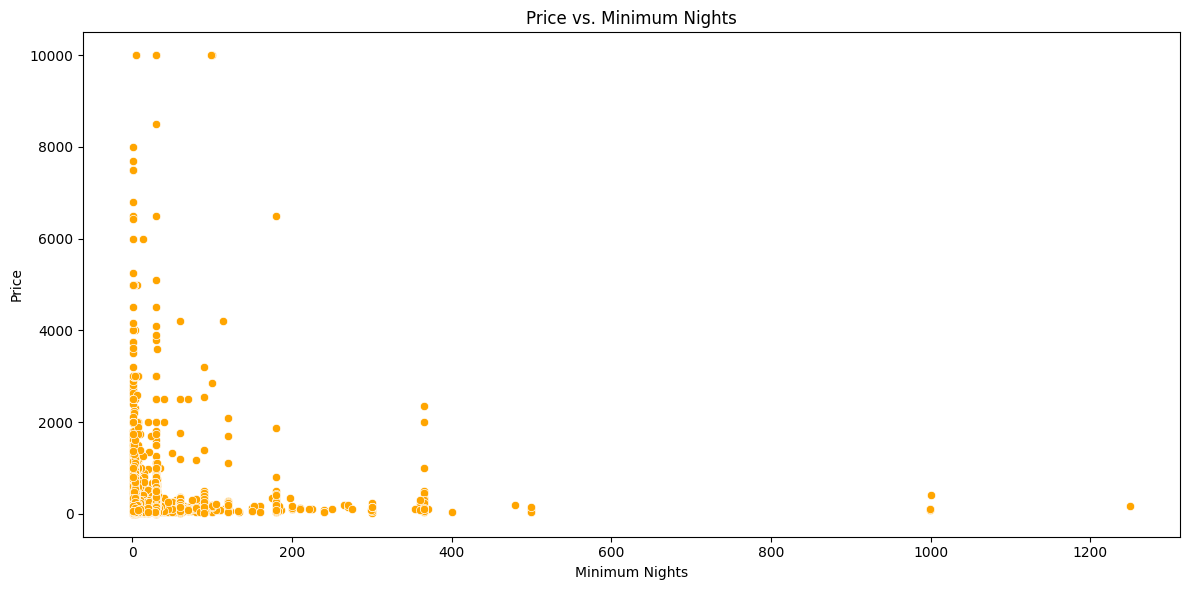

Outliers in pricing:
       neighbourhood  room_type  price  minimum_nights  number_of_reviews
496              202          0   2000              30                 30
762              209          0   1300               5                 28
946              202          1   3000               7                  0
1105             119          1   1300               1                  0
1414             202          0   1000              30                 44
...              ...        ...    ...             ...                ...
48301             34          1    999              30                  0
48304             95          0   2999              30                  0
48305            201          0   1999              30                  0
48523             13          0   1369               1                  0
48535             13          0   1749               1                  0

[388 rows x 5 columns]


In [58]:
# Investigating potential reasons for pricing outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='minimum_nights', y='price', data=airbnb, color='orange')
plt.title('Price vs. Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
airbnb['price_zscore'] = (airbnb['price'] - airbnb['price'].mean()) / airbnb['price'].std()
outliers = airbnb[(np.abs(airbnb['price_zscore']) > 3)]
print("Outliers in pricing:")
print(outliers[['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']])